# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
df=pd.read_csv("nse_kaholas.csv")


# Analysing the Patterns of the training Dataset

In [30]:
df.head()

,DATE1,SYMBOL,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES,DELIV_QTY,DELIV_PER
0,11-02-2022,NETFLTGILT,22.40,22.02,22.48,22.02,22.25,22.27,22.25,16697,3.72,83,12968.0,77.67
1,11-02-2022,NETFMID150,116.02,119.50,119.50,113.61,114.10,113.95,114.68,224822,257.82,1780,200777.0,89.30
2,11-02-2022,NETFNIF100,183.49,178.50,184.98,178.50,182.05,182.22,182.07,2354,4.29,135,2140.0,90.91
3,11-02-2022,NETFDIVOPP,45.63,46.25,46.25,45.07,45.33,45.09,45.40,1239,0.56,86,1122.0,90.56
4,11-02-2022,NETFGILT5Y,49.66,49.66,49.82,49.47,49.82,49.79,49.72,82821,41.18,322,74512.0,89.97


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809339 entries, 0 to 809338
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    DATE1          809339 non-null  object 
 1   SYMBOL          809339 non-null  object 
 2    PREV_CLOSE     809339 non-null  float64
 3    OPEN_PRICE     809339 non-null  float64
 4    HIGH_PRICE     809339 non-null  float64
 5    LOW_PRICE      809339 non-null  float64
 6    LAST_PRICE     809339 non-null  float64
 7    CLOSE_PRICE    809339 non-null  float64
 8    AVG_PRICE      809339 non-null  float64
 9    TTL_TRD_QNTY   809339 non-null  int64  
 10   TURNOVER_LACS  809339 non-null  float64
 11   NO_OF_TRADES   809339 non-null  int64  
 12   DELIV_QTY      809336 non-null  float64
 13   DELIV_PER      809336 non-null  float64
dtypes: float64(10), int64(2), object(2)
memory usage: 86.4+ MB


10 float datatype column, 2 object datatype column and 2 intger datatype columns are present in the dataset.

In [32]:
# Checking shape
df.shape

(809339, 14)

809339 rows and 14 columns present in the dataset.

In [33]:
# Checking Null values
df.isnull().sum()

 DATE1            0
SYMBOL            0
 PREV_CLOSE       0
 OPEN_PRICE       0
 HIGH_PRICE       0
 LOW_PRICE        0
 LAST_PRICE       0
 CLOSE_PRICE      0
 AVG_PRICE        0
 TTL_TRD_QNTY     0
 TURNOVER_LACS    0
 NO_OF_TRADES     0
 DELIV_QTY        3
 DELIV_PER        3
dtype: int64

Null values are present most of the columns.

In [3]:
# Converting symbol column to numeric
df['SYMBOL']=pd.to_numeric(df['SYMBOL'], errors='coerce')

In [4]:

# Removing null values
df.dropna(axis=1, inplace=True)



# Statistical Summary

In [36]:
df.describe()

,PREV_CLOSE,OPEN_PRICE,HIGH_PRICE,LOW_PRICE,LAST_PRICE,CLOSE_PRICE,AVG_PRICE,TTL_TRD_QNTY,TURNOVER_LACS,NO_OF_TRADES
count,809339.000000,809339.000000,809339.000000,809339.000000,809339.000000,809339.000000,809339.000000,8.093390e+05,8.093390e+05,8.093390e+05
mean,668.820979,670.839406,682.637098,658.268809,669.363227,669.326862,670.396131,1.862044e+06,3.986382e+03,1.273804e+04
std,2721.045148,2727.110313,2764.114183,2686.341895,2721.562123,2721.971042,2724.541708,1.778833e+07,1.913021e+04,3.770547e+04
min,0.050000,0.050000,0.100000,0.050000,0.050000,0.050000,0.000000,1.000000e+00,0.000000e+00,1.000000e+00
25%,44.200000,44.550000,45.700000,43.150000,44.300000,44.300000,44.420000,1.891600e+04,1.812000e+01,3.730000e+02
50%,146.600000,147.450000,150.950000,143.500000,146.850000,146.750000,147.220000,9.747100e+04,1.562100e+02,2.018000e+03
75%,478.650000,480.400000,491.000000,470.000000,479.000000,479.200000,480.400000,5.402470e+05,1.094525e+03,8.835000e+03
max,96973.850000,96770.000000,98599.950000,92750.000000,97688.000000,96973.850000,94963.570000,6.161122e+09,3.564334e+06,2.428917e+06


Number of values is same in all the columns except volume.

Not much difference between mean and median(50%)

Not much difference between 75% and max.

# Now we need only 2 columns for model building that is open and close

In [5]:
training_set = df.iloc[:, 1:2].values

# Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating Data with TimeSteps

In [43]:
training_set.shape

(809339, 1)

In [7]:
X_train = []
y_train = []
for i in range(60, 2000): # taking less data because it is taking much time in execution
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Using LSTM for model building

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [9]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

regressor.add(Dense(units = 1))

In [10]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [12]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

history=regressor.fit(X_train, y_train, epochs = 50, batch_size = 32, validation_split=0.1)

Epoch 1/50
55/55 [==============================] - 39s 273ms/step - loss: 6.2741e-04 - val_loss: 8.7199e-05
Epoch 2/50
55/55 [==============================] - 10s 176ms/step - loss: 6.1431e-04 - val_loss: 7.1302e-05
Epoch 3/50
55/55 [==============================] - 9s 170ms/step - loss: 6.1317e-04 - val_loss: 8.1341e-05
Epoch 4/50
55/55 [==============================] - 9s 157ms/step - loss: 6.1397e-04 - val_loss: 6.9909e-05
Epoch 5/50
55/55 [==============================] - 9s 169ms/step - loss: 6.1304e-04 - val_loss: 7.4167e-05
Epoch 6/50
55/55 [==============================] - 10s 177ms/step - loss: 6.1046e-04 - val_loss: 6.9883e-05
Epoch 7/50
55/55 [==============================] - 9s 173ms/step - loss: 6.0600e-04 - val_loss: 9.0537e-05
Epoch 8/50
55/55 [==============================] - 9s 157ms/step - loss: 6.1171e-04 - val_loss: 6.9891e-05
Epoch 9/50
55/55 [==============================] - 9s 165ms/step - loss: 6.0940e-04 - val_loss: 6.9958e-05
Epoch 10/50
55/55 [======

# Plotting the Graph

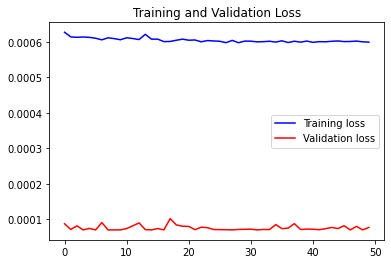

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()


# Prediction 

In [15]:
test = df.iloc[:, 1:2].values

# Applying Inverse Transfromation for obtaining the result

In [18]:
dataset_total = pd.concat((df[' OPEN_PRICE'], df[' OPEN_PRICE']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

In [19]:
predicted

array([[850.6563 ],
       [850.09485],
       [849.62256],
       [849.325  ],
       [849.1961 ],
       [849.1912 ],
       [849.26276],
       [849.3733 ],
       [849.50085],
       [849.61536],
       [849.7174 ],
       [849.8237 ],
       [849.942  ],
       [850.07245],
       [850.20996],
       [850.3423 ]], dtype=float32)

In [21]:
test

array([[2.24000e+01],
       [1.16020e+02],
       [1.83490e+02],
       ...,
       [4.95000e+00],
       [4.33000e+02],
       [2.33931e+04]])

# Now Plotting the Results on Graph

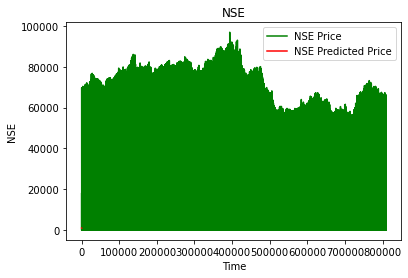

In [31]:
plt.plot(test, color = 'green', label = 'NSE Price')
plt.plot(predicted, color = 'red', label = 'NSE Predicted Price')
plt.title('NSE')
plt.xlabel('Time')
plt.ylabel('NSE')
plt.legend()
plt.show()

The above plot shows that NSE will increase  and then decreaser  model prediction also shows that the price will increase.

​